In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
matches = pd.read_csv('data.csv')
deliveries = pd.read_csv('delivery.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [4]:
matches.shape , deliveries.shape

((577, 18), (1000, 21))

In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [6]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [7]:
#Summing(Grouping) the total runs in both the innings on a particular matchid
totalrun_df = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index() 

In [8]:
totalrun_df

,match_id,inning,total_runs
0,1,1,222
1,1,2,82
2,2,1,240
3,2,2,207
4,3,1,129
5,3,2,132
6,4,1,165
7,4,2,166
8,5,1,51


In [9]:
#Target for the second innings(Runs to be chased for victory)

totalrun_df = totalrun_df[totalrun_df['inning']==1]
totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)
totalrun_df

C:\Users\Divyanshu Dubey\AppData\Local\Temp\ipykernel_15580\1983110054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)


,match_id,inning,total_runs
0,1,1,223
2,2,1,241
4,3,1,130
6,4,1,166
8,5,1,52


In [10]:
totalrun_df.shape

(5, 3)

In [11]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [12]:
match_df = matches.merge(totalrun_df[['match_id','total_runs']],
                         left_on ='id',right_on ='match_id')
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,1,223
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,2,241
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN,3,130
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN,4,166
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN,5,52


In [13]:
match_df['team1'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers'], dtype=object)

In [14]:
teams = ['Sunrisers Hyderabad',
        'Mumbai Indians',
        'Royal Challengers Bangalore',
        'Kolkata Knight Riders',
        'Kings XI Punjab',
        'Chennai Super Kings',
        'Rajasthan Royals',
        'Delhi Capitals']

In [15]:
#Replacing Delhi Daredevils with Delhi Capitals

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals') 

#Replacing Deccan Chargers with Sunrisers Hyderabad

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad') 

In [16]:
# will consider only those teams which are frequently occuring in the team list 

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]\

match_df['team1'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad'], dtype=object)

In [17]:
match_df.shape

(5, 20)

In [18]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,1,223
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,2,241
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN,3,130
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN,4,166
4,5,2008,Kolkata,2008-04-20,Sunrisers Hyderabad,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN,5,52


In [19]:
# Checking the matches which resulted in DL method 

match_df[match_df['dl_applied']==1].style.background_gradient(cmap = 'plasma')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs


In [20]:
# ignoring the matches which were DL method

match_df = match_df[match_df['dl_applied']==0]

#Considering the match_id , city , winner and total runs 

match_df = match_df[['match_id','city','winner','total_runs']]
match_df

,match_id,city,winner,total_runs
0,1,Bangalore,Kolkata Knight Riders,223
1,2,Chandigarh,Chennai Super Kings,241
2,3,Delhi,Delhi Daredevils,130
3,4,Mumbai,Royal Challengers Bangalore,166
4,5,Kolkata,Kolkata Knight Riders,52


In [21]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [22]:
# Merging match_df with deliveries on match_id
#X{_x} merges with Y{_y}

delivery_df = match_df.merge(deliveries,on='match_id')
delivery_df.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Bangalore,Kolkata Knight Riders,223,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [23]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [24]:
# Considering 2nd Inning

delivery_df= delivery_df[delivery_df['inning']==2]
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
124,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,...,0,0,0,0,1,0,1,NaN,NaN,NaN
125,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,W Jaffer,...,0,0,0,0,0,1,1,NaN,NaN,NaN
126,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,W Jaffer,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,W Jaffer,...,0,0,0,0,1,0,1,NaN,NaN,NaN
128,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,R Dravid,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [25]:
delivery_df.shape

(445, 24)

In [26]:
"""
So by observation we can observe that in match_df we had taken first innings total_runs , right and in the second case 
that is in the delivery dataframe we consider second inning runs, as our main aim is to find the probability of either 
team to win or loose , we need current runs and runrate ,so for current runs we can apply group by on match_id and take
the cumulative wrt total_runs_y , now , basically total_runs was present in match_df as well as delivery_df , but we 
merged both dataframes and it resulted in total_runs_x and total_runs_y, so total_runs_x is the first inning run and 
total_runs_y is the second inning runs, ball by ball , applying cumulative sum, this becomes current score .

total_runs_y gives gives the runs scored after each ball in the second inning . So we want to tabulate total second 
innings runs , we will group by match_id and we will apply cumulative sum.

"""


#Current Score of a particular match.

delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
124,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,...,0,0,0,1,0,1,NaN,NaN,NaN,1
125,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,W Jaffer,...,0,0,0,0,1,1,NaN,NaN,NaN,2
126,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,W Jaffer,...,0,0,0,0,0,0,NaN,NaN,NaN,2
127,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,W Jaffer,...,0,0,0,1,0,1,NaN,NaN,NaN,3
128,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,R Dravid,...,0,0,0,1,0,1,NaN,NaN,NaN,4


In [27]:
# Runs Left 

delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,...,0,0,1,0,1,NaN,NaN,NaN,1,222
125,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,W Jaffer,...,0,0,0,1,1,NaN,NaN,NaN,2,221
126,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,W Jaffer,...,0,0,0,0,0,NaN,NaN,NaN,2,221
127,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,W Jaffer,...,0,0,1,0,1,NaN,NaN,NaN,3,220
128,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,R Dravid,...,0,0,1,0,1,NaN,NaN,NaN,4,219


In [28]:
#Balls Left 

delivery_df['balls_left'] = 126 - (delivery_df['over']*6+delivery_df['ball'])

delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,...,0,1,0,1,NaN,NaN,NaN,1,222,119
125,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,W Jaffer,...,0,0,1,1,NaN,NaN,NaN,2,221,118
126,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,W Jaffer,...,0,0,0,0,NaN,NaN,NaN,2,221,117
127,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,W Jaffer,...,0,1,0,1,NaN,NaN,NaN,3,220,116
128,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,R Dravid,...,0,1,0,1,NaN,NaN,NaN,4,219,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,4,Mumbai,Royal Challengers Bangalore,166,2,Royal Challengers Bangalore,Mumbai Indians,20,1,MV Boucher,...,0,1,0,1,NaN,NaN,NaN,164,2,5
934,4,Mumbai,Royal Challengers Bangalore,166,2,Royal Challengers Bangalore,Mumbai Indians,20,2,B Akhil,...,0,0,1,1,NaN,NaN,NaN,165,1,4
935,4,Mumbai,Royal Challengers Bangalore,166,2,Royal Challengers Bangalore,Mumbai Indians,20,3,B Akhil,...,0,0,0,0,NaN,NaN,NaN,165,1,3
936,4,Mumbai,Royal Challengers Bangalore,166,2,Royal Challengers Bangalore,Mumbai Indians,20,4,B Akhil,...,0,0,0,0,NaN,NaN,NaN,165,1,2


In [29]:
# Player Dismissal on a particular ball 
list(delivery_df['player_dismissed'].unique())[:2]

[nan, 'R Dravid']

In [30]:
# Filling NAN values with zero 

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# Now we convert this player dismissed call into a bollean call 
# If the player is not dismissed it is 0 else its 1 .

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x : x if x=="0" else "1") 

#Converting String into int 

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

delivery_df['player_dismissed'].unique()

array([0, 1])

In [31]:
# Wickets Fallen 

wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10-wickets
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,...,1,0,1,0,NaN,NaN,1,222,119,10
125,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,W Jaffer,...,0,1,1,0,NaN,NaN,2,221,118,10
126,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,W Jaffer,...,0,0,0,0,NaN,NaN,2,221,117,10
127,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,W Jaffer,...,1,0,1,0,NaN,NaN,3,220,116,10
128,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,R Dravid,...,1,0,1,0,NaN,NaN,4,219,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,4,Mumbai,Royal Challengers Bangalore,166,2,Royal Challengers Bangalore,Mumbai Indians,20,1,MV Boucher,...,1,0,1,0,NaN,NaN,164,2,5,5
934,4,Mumbai,Royal Challengers Bangalore,166,2,Royal Challengers Bangalore,Mumbai Indians,20,2,B Akhil,...,0,1,1,0,NaN,NaN,165,1,4,5
935,4,Mumbai,Royal Challengers Bangalore,166,2,Royal Challengers Bangalore,Mumbai Indians,20,3,B Akhil,...,0,0,0,0,NaN,NaN,165,1,3,5
936,4,Mumbai,Royal Challengers Bangalore,166,2,Royal Challengers Bangalore,Mumbai Indians,20,4,B Akhil,...,0,0,0,0,NaN,NaN,165,1,2,5


In [32]:
#Current Run rate

delivery_df['cur_run_rate'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

#Required Run Rate 

delivery_df['req_run_rate'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate
124,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,...,1,0,NaN,NaN,1,222,119,10,6.0,11.193277
125,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,W Jaffer,...,1,0,NaN,NaN,2,221,118,10,6.0,11.237288
126,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,W Jaffer,...,0,0,NaN,NaN,2,221,117,10,4.0,11.333333
127,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,W Jaffer,...,1,0,NaN,NaN,3,220,116,10,4.5,11.379310
128,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,R Dravid,...,1,0,NaN,NaN,4,219,115,10,4.8,11.426087


In [33]:
def resultfun(row):
    return 1 if row['batting_team']==row['winner'] else 0  

In [34]:
delivery_df['result'] = delivery_df.apply(resultfun , axis=1)
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate,result
124,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,1,R Dravid,...,0,NaN,NaN,1,222,119,10,6.0,11.193277,0
125,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,W Jaffer,...,0,NaN,NaN,2,221,118,10,6.0,11.237288,0
126,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,W Jaffer,...,0,NaN,NaN,2,221,117,10,4.0,11.333333,0
127,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,W Jaffer,...,0,NaN,NaN,3,220,116,10,4.5,11.379310,0
128,1,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,R Dravid,...,0,NaN,NaN,4,219,115,10,4.8,11.426087,0


C:\Users\Divyanshu Dubey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='result', ylabel='count'>

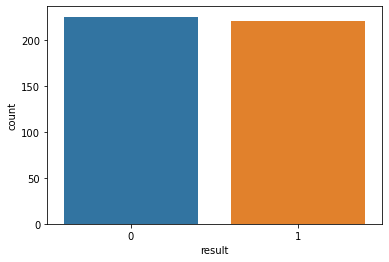

In [35]:
sns.countplot(delivery_df['result'])

In [36]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','cur_run_rate'
                        ,'req_run_rate','result']]
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,222,119,10,223,6.0,11.193277,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,118,10,223,6.0,11.237288,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,117,10,223,4.0,11.333333,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,116,10,223,4.5,11.379310,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,115,10,223,4.8,11.426087,0


In [37]:
final_df.shape

(445, 10)

In [38]:
final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
cur_run_rate    0
req_run_rate    0
result          0
dtype: int64

In [39]:
#Dropping off null values 

final_df =final_df.dropna()

final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
cur_run_rate    0
req_run_rate    0
result          0
dtype: int64

In [40]:
final_df = final_df[final_df['balls_left'] != 0 ]

In [41]:
data = final_df.copy()
test = data['result']
train = data.drop(['result'], axis = 1)
train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,222,119,10,223,6.0,11.193277
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,118,10,223,6.0,11.237288
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,117,10,223,4.0,11.333333
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,116,10,223,4.5,11.379310
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,115,10,223,4.8,11.426087


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state =1)

X_train.shape , X_test.shape

((355, 9), (89, 9))

In [44]:
X_train.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets', 'total_runs_x', 'cur_run_rate', 'req_run_rate'],
      dtype='object')

In [45]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics 

In [46]:
#Batting Team , Bowling Team and City are categorical columns 
#They will be converted to numeric using OneHot Encoder

"""
abc--->100
       010
       
"""

cf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse = False ,drop = 'first'),['batting_team','bowling_team','city'])
],remainder = 'passthrough')

In [50]:
#Creating A pipeline 

pipe = Pipeline(steps=[
      ('step1',cf),
      ('step2',LogisticRegression(solver ='liblinear'))
])
#Fitting the Training data 
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [51]:
y_pred = pipe.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

1.0


In [52]:
pipe.predict_proba(X_test)[10]

array([2.22044605e-16, 1.00000000e+00])

In [55]:
# Selecting Random Forest Classifier 

pipe2 = Pipeline (steps =[
    ('step1',cf),
    ('step2',RandomForestClassifier())
])
pipe2.fit(X_train,y_train)
print(metrics.accuracy_score(y_test,pipe2.predict(X_test)))

1.0


In [56]:
#0th index is loose prob and 1st index is win prob 

pipe2.predict_proba(X_test)[10]

array([0., 1.])

In [57]:
'''
We will go with probability because i need to 

showcase the probability right , even though random fores tis giving more acurate result , but random forset 
is being biased at one side,as you you can observe the  probability of winning for 10th sample is shown 
as 98% and 2% loose prob, this is kind of too strong or maybe sometimes unrealistic , so it is better to use 
a model which gives equal justice towards both sides , as we also don't know which team will outperform and win 
the game !

'''

"\nWe will go with probability because i need to \n\nshowcase the probability right , even though random fores tis giving more acurate result , but random forset \nis being biased at one side,as you you can observe the  probability of winning for 10th sample is shown \nas 98% and 2% loose prob, this is kind of too strong or maybe sometimes unrealistic , so it is better to use \na model which gives equal justice towards both sides , as we also don't know which team will outperform and win \nthe game !\n\n"

In [58]:
# Solving the logistic Regression Model 

In [59]:
import pickle 
pickle.dump(pipe,open('pipe.pkl','wb'))